In [3]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163498 sha256=c739c4df6b09c096b15344595aec38533409220247183205527dc55a6b71b6ae
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [35]:
import pandas as pd
from surprise import BaselineOnly, SVD, AlgoBase, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [16]:
train_data = pd.read_json('/content/drive/MyDrive/Yelp_keyword_extraction_set/yelp_training_set_review.json', lines=True)

In [17]:
train_data.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [18]:
len(train_data)

229907

In [19]:
data = Dataset.load_from_df(train_data[['user_id', 'business_id', 'stars']], Reader(rating_scale=(1, 5)))
results = {}

In [ ]:
# MF-BiasOnly
algo_bias_only = SVD()
results["MF-BiasOnly"] = cross_validate(algo_bias_only, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1242  1.1236  1.1264  1.1243  1.1201  1.1237  0.0020  
MAE (testset)     0.8838  0.8858  0.8875  0.8883  0.8825  0.8856  0.0022  
Fit time          3.95    3.54    4.46    3.60    3.58    3.83    0.35    
Test time         0.65    0.55    0.78    0.53    0.54    0.61    0.09    


In [ ]:
# MF-ALS
algo_als = BaselineOnly(bsl_options={"method": "als"})
results["MF-ALS"] = cross_validate(algo_als, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1209  1.1160  1.1159  1.1142  1.1164  1.1167  0.0022  
MAE (testset)     0.8848  0.8804  0.8802  0.8775  0.8817  0.8809  0.0024  
Fit time          0.97    1.12    1.18    1.10    1.11    1.10    0.07    
Test time         0.58    0.29    0.19    0.18    0.19    0.29    0.15    


In [ ]:
# MF-SGD
algo_sgd = BaselineOnly(bsl_options={"method": "sgd"})
results["MF-SGD"] = cross_validate(algo_sgd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1102  1.1095  1.1194  1.1149  1.1123  1.1133  0.0036  
MAE (testset)     0.8731  0.8730  0.8775  0.8778  0.8757  0.8754  0.0021  
Fit time          1.52    1.54    2.20    1.52    1.71    1.70    0.26    
Test time         0.19    0.20    0.30    0.54    0.55    0.35    0.16    


In [ ]:
mse_results = []
mae_results = []
factors = []
for factor in range(5,201,10):
    algo = SVD(n_factors=factor)
    results_n_factors = cross_validate(algo, data, measures=['RMSE','mae'], cv=5, verbose=False)
    mse = (results_n_factors['test_rmse'].mean())**2
    factors.append(factor)
    mse_results.append(mse)
    mae_results.append(results_n_factors['test_mae'].mean())

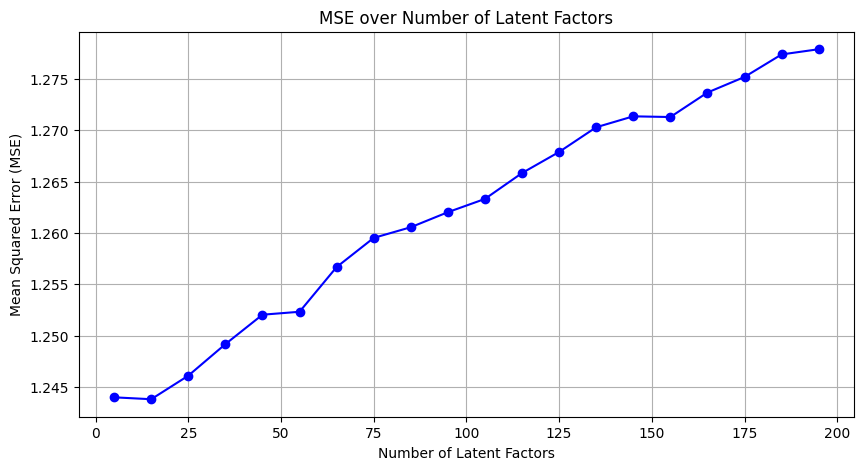

<Figure size 640x480 with 0 Axes>

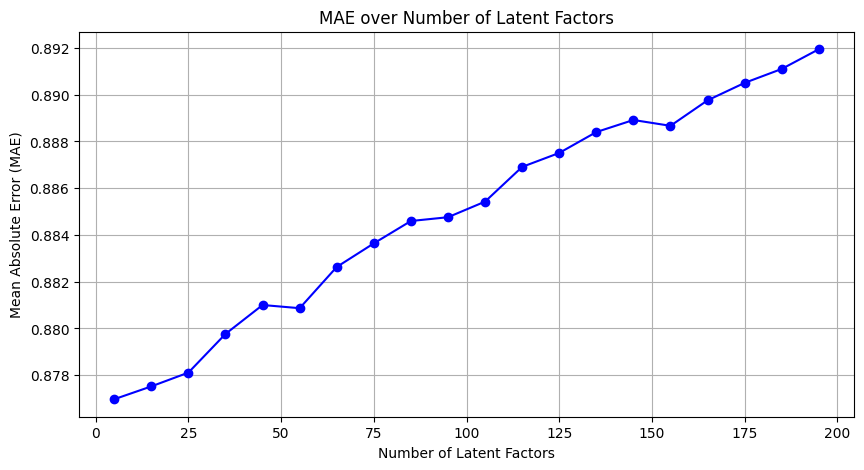

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(factors, mse_results, marker='o', linestyle='-', color='blue')
plt.title('MSE over Number of Latent Factors')
plt.xlabel('Number of Latent Factors')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

plt.clf()

plt.figure(figsize=(10, 5))
plt.plot(factors, mae_results, marker='o', linestyle='-', color='blue')
plt.title('MAE over Number of Latent Factors')
plt.xlabel('Number of Latent Factors')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'n_factors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150],
    'n_epochs': [5, 10, 20, 30, 40],
    # 'lr_all': [0.002, 0.005],
    # 'reg_all': [0.02, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print("Best RMSE score attained: ", gs.best_score['rmse'])
print("Parameters for best RMSE score: ", gs.best_params['rmse'])
print("Best MAE score attained: ", gs.best_score['mae'])
print("Parameters for best MAE score: ", gs.best_params['mae'])

Best RMSE score attained:  1.1190450967592944
Parameters for best RMSE score:  {'n_factors': 5, 'n_epochs': 30}
Best MAE score attained:  0.8787544752825482
Parameters for best MAE score:  {'n_factors': 5, 'n_epochs': 30}


In [ ]:
param_grid_sgd = {
    'bsl_options': {
        'method': ['sgd'],
        'n_epochs': [10, 20, 30, 40, 50],
        # 'learning_rate': [0.005, 0.01, 0.02],
        'reg': [0.02, 0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.4]
    }
}

gs_sgd = GridSearchCV(BaselineOnly, param_grid_sgd, measures=['rmse', 'mae'], cv=3)
gs_sgd.fit(data)

print("Best RMSE for SGD: ", gs_sgd.best_score['rmse'])
print("Best parameters for SGD: ", gs_sgd.best_params['rmse'])
print("Best MAE score attained: ", gs_sgd.best_score['mae'])
print("Parameters for best MAE score: ", gs_sgd.best_params['mae'])

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

In [ ]:
param_grid_als = {
    'bsl_options': {
        'method': ['als'],
        'n_epochs': [10, 20, 30, 40, 50],
        'reg_u': [10, 15, 20],
        'reg_i': [5, 10, 15]
    }
}

gs_als = GridSearchCV(BaselineOnly, param_grid_als, measures=['rmse','mae'], cv=3)
gs_als.fit(data)

print("Best RMSE for ALS: ", gs_als.best_score['rmse'])
print("Best parameters for ALS: ", gs_als.best_params['rmse'])
print("Best MAE score attained: ", gs_als.best_score['mae'])
print("Parameters for best MAE score: ", gs_als.best_params['mae'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

## Testing with the best hyper-parameters

In [29]:
testset = pd.read_json('/content/drive/MyDrive/Yelp_keyword_extraction_set/yelp_test_set_review.json', lines=True)
# Convert the test set into a list of (user, item, rating) tuples
test_data = list(zip(testset.user_id, testset.business_id, testset.stars))

In [31]:
len(test_data)

22956

In [32]:
trainset_sgd = data.build_full_trainset()
algo_sgd = BaselineOnly(bsl_options={"method": "sgd", 'n_epochs': 50, 'reg': 0.02})

# Fit the algorithm to the trainset
algo_sgd.fit(trainset_sgd)

Estimating biases using sgd...


In [33]:
# Predict ratings for the testset
predictions = algo_sgd.test(test_data)

results_df = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions],
                          columns=['user_id', 'business_id', 'true_ratings', 'predicted_ratings'])

In [34]:
results_df

,user_id,business_id,true_ratings,predicted_ratings
0,2WkM3pYfx7bt46tv7u4hHA,AuMz7XGkjLcIUurp_AD51w,5,3.595684
1,eHWbF0k5QOBLgQXhGdeHmg,8i5hB_dmf33NVbWE5SwoMQ,5,3.766723
2,HrjjHfDGTafXyKpQKNrYHg,nvaAUTTl7oqiJDhuimNG6A,5,4.019429
3,DrWLhrK8WMZf7Jb-Oqc7ww,QwaoxP5Mgm3PJuZo_4bFsw,1,3.922263
4,jDCONTPR6nyc3J7iimwzkQ,0lEp4vISRmOXa8Xz2pWhbw,4,3.152062
...,...,...,...,...
22951,UaIq_zJxnVxU_HfvC16i_A,s1dex3Z3QoqiK7V-zXUgAw,4,4.933829
22952,XA_lIArLNis1tzrqSywzHQ,PX3e3qtBx_5VC3vqq47jpQ,4,3.518811
22953,TVL1e0NHhxAE6PpeXGfTOA,SyXz4OwSNxfbszTHP-d2aA,5,4.421382
22954,v7pgiW6IS8jSkQ2B4jeXxg,soH8ekCER45AjfMaM6cJ2A,4,3.359597
